In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rampy as rp

In [3]:
x = np.arange(0,100,0.1)

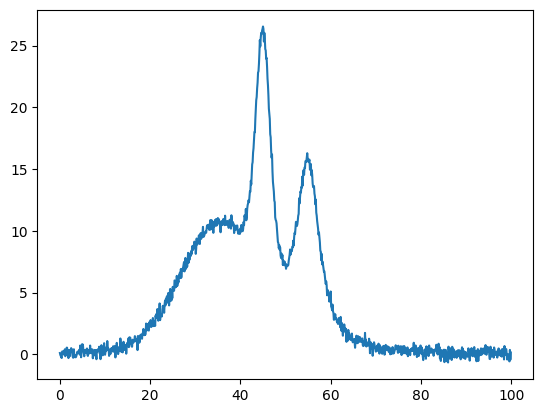

In [23]:
y_fit_perfect = (rp.gaussian(x, 10.0, 35.0, 10.0) 
+ rp.lorentzian(x, 15.0, 55.0, 3.0) 
+ rp.pseudovoigt(x, 20.0, 45.0, 2.0, 0.4))
noise = np.random.randn(len(x))*0.3
y_fit = y_fit_perfect + noise
CD = np.diag(0.3*np.ones(len(x)))
y = gv.gvar(y_fit, CD)
plt.plot(x, y_fit)

In [24]:
import lsqfit
import gvar as gv

In [36]:
prior = {}
prior['a1'] = gv.gvar(10.5, 5.0)
prior['f1'] = gv.gvar(30.0, 10.0)
prior['l1'] = gv.gvar(3.0, 5.0)

prior['a2'] = gv.gvar(20.5, 0.5)
prior['f2'] = gv.gvar(55.0, 10.0)
prior['l2'] = gv.gvar(3.0, 5.0)

prior['a3'] = gv.gvar(20.5, 5.0)
prior['f3'] = gv.gvar(44.0, 5.0)
prior['l3'] = gv.gvar(3.0, 5.0)
prior['lr3'] = gv.gvar('0.40(1)')

def fcn(x, p):
    y_calc = (rp.gaussian(x, p['a1'], p['f1'], p['l1']) 
+ rp.lorentzian(x, p['a2'], p['f2'], p['l2']) 
+ rp.pseudovoigt(x, p['a3'], p['f3'], p['l3'], p['lr3']))
    return y_calc
    
# do the fit
fit = lsqfit.nonlinear_fit(data=(x, y), prior=prior, fcn=fcn, debug=True)
print(fit.format(maxline=True))       # print standard summary of fit

Least Squares Fit:
  chi2/dof [dof] = 0.41 [1000]    Q = 1    logGBF = -561.39

Parameters:
             a1   10.020 (59)     [ 10.5 (5.0) ]  
             f1    34.90 (12)     [    30 (10) ]  
             l1     9.87 (12)     [  3.0 (5.0) ]  *
             a2    15.30 (12)     [ 20.50 (50) ]  *****
             f2   54.961 (24)     [    55 (10) ]  
             l2    2.949 (36)     [  3.0 (5.0) ]  
             a3    20.19 (18)     [ 20.5 (5.0) ]  
             f3   44.997 (13)     [ 44.0 (5.0) ]  
             l3    2.003 (24)     [  3.0 (5.0) ]  
            lr3   0.4007 (99)     [ 0.400 (10) ]  

Fit:
     x[k]              y[k]      f(x[k],p)
------------------------------------------
        0         0.10 (55)    0.0616 (11)  
      0.1        -0.06 (55)    0.0620 (11)  
      0.2        -0.14 (55)    0.0623 (11)  
      0.3        -0.25 (55)    0.0626 (11)  
      0.4        -0.30 (55)    0.0630 (11)  
      0.5         0.23 (55)    0.0633 (11)  
      0.6         0.17 (55)   

In [32]:
fit.bootstrap_iter()

<generator object nonlinear_fit.bootstrapped_fit_iter at 0x153102fb0>